# Movie Recommandation system

    The goal of this project to build a Movie Recommandations System, The system will be working on recommanding a movie to the user based on the user's rating, genre of a movie that interest the user, and the timestamp. Providing personlized service to a user results in user satisfaction and successful business.

## Introduction to the data:

    This dataset describes 5-star rating and free-text tagging activity from MovieLens(http://movielens.org), a movie recommendation service. It contains 100836 ratings across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

    Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

    The data are contained in the files `movies.csv`, `ratings.csv`. More details about the contents and use of all these files follows.

    This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.


### Import the needed Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

### Load Datasets

> First Dataset is the Movies Dataset: Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format:
* movieId
* title
* genres

Genres are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western


In [2]:
# using pd.read_csv() I am loading the movies dataset
# explored the first five rows of my data using .head() method
movies = pd.read_csv(r"C:\Users\mutha\Downloads\ml-latest-small\ml-latest-small\movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


> Second Dataset is the Ratings Dataset: All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:
* userId
* movieId
* rating
* timestamp

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [3]:
# using pd.read_csv() to load the ratings dataset
# explored the top five rows of my dataset using .head()
ratings = pd.read_csv(r"C:\Users\mutha\Downloads\ml-latest-small\ml-latest-small\ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Merge Datasetes:
    Now I have both of my datasets(movies dataset, ratings dataset) loaded I will go ahead and merge them on to the movie ID using pandas funaction pd.merge(), then print the top five rows to make sure that I have my new data ready to go.

In [4]:
# here I am merging the two datasets
# Next printed the top five rows
df = pd.merge(movies, ratings, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


### Data Wrangling

In [5]:
# Calling info() on my data to learn data insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [6]:
# Calling .describe() to get a summary of the data
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [7]:
# Here I am going to check for missing data using the pandas method .isna() followed by .any()
df.isna().any()

movieId      False
title        False
genres       False
userId       False
rating       False
timestamp    False
dtype: bool

We noticed that the type of 'timestamp' column is 'int64' that's because the time stored as Unix time format, which reflects the number of seconds starting from the date of 01/01/1970 the date where this data started to September 26, 2018 the date where the data where generated. next I will be converting 'timestamp' column to human readable format.

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25 06:52:26
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13 12:59:30
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18 05:28:03


### Exploratory Data Analysis (EDA) 

Through this EDA, I aim to gain a comprehensive understanding of the data and prepare it for further analysis, I will create visualizations like histograms, lineplot and heatmap to explore data distribution, and uncover relationships between variables.

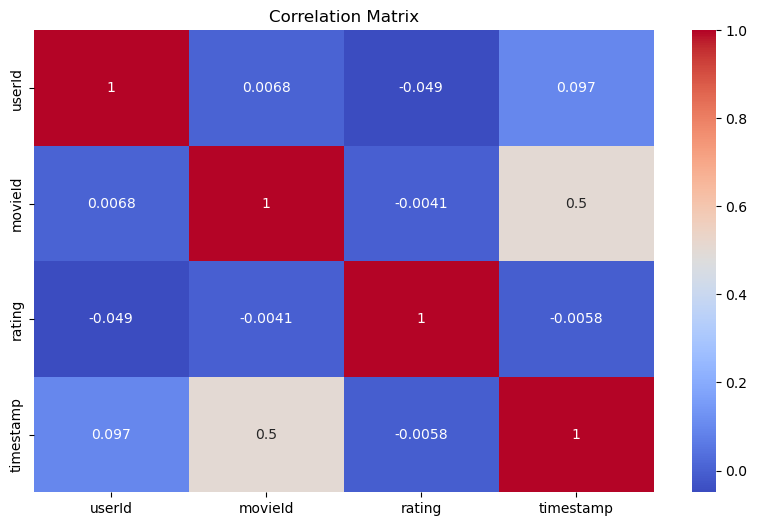

In [9]:
# Heatmap to show the correlation of the data 
plt.figure(figsize=(10, 6))
corr_matrix = df[['userId', 'movieId', 'rating', 'timestamp']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Heatmap

From the above Heatmap we see that 'movieId' has the highest correlation rate of 0.5 with the 'timestamp' column.

#### Movie Rating Distribution

Next I will explore the distribution of Movie Ratings, earlier we mentioned that the ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

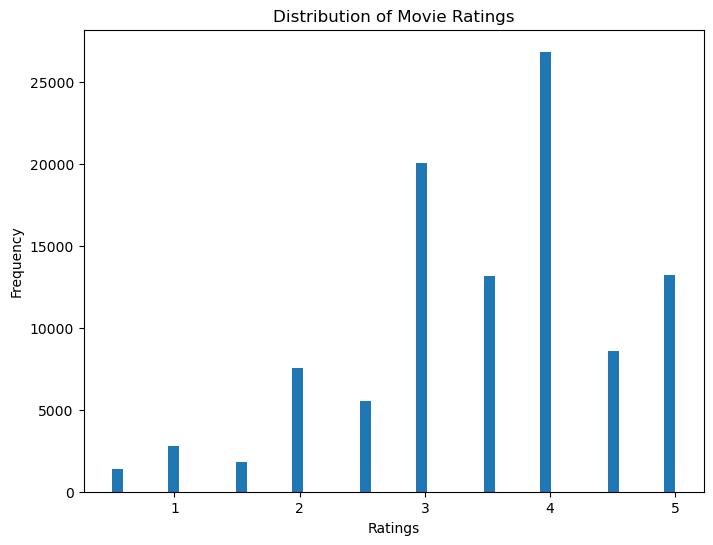

In [10]:
plt.figure(figsize=(8,6))
df['rating'].hist(bins=50)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Ratings')
plt.grid(False)
plt.show()

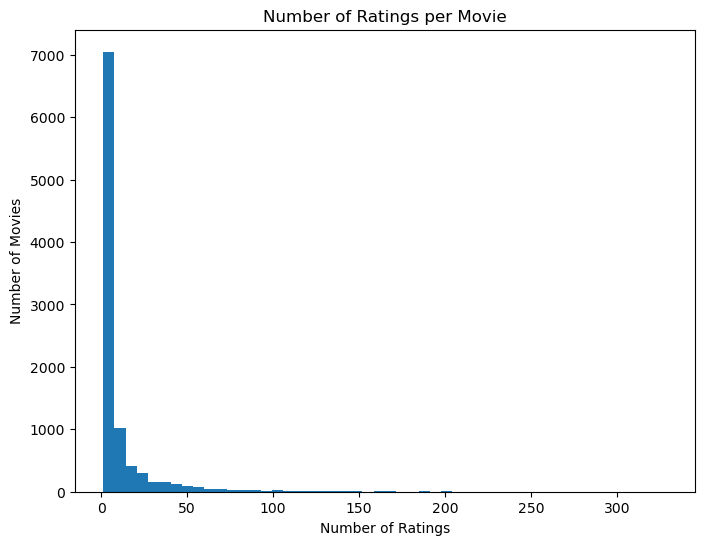

In [11]:
# Next I will be getting the ratings per movie
# To do that I will group my data by title then get the size of it and then sort it in descending order
rating_per_movie = df.groupby('title').size().sort_values(ascending=False)
# Using matplotlib I am going to plot the number of rating per movie
plt.figure(figsize=(8,6))
rating_per_movie.hist(bins=50)
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.title('Number of Ratings per Movie')
plt.grid(False)
plt.show()

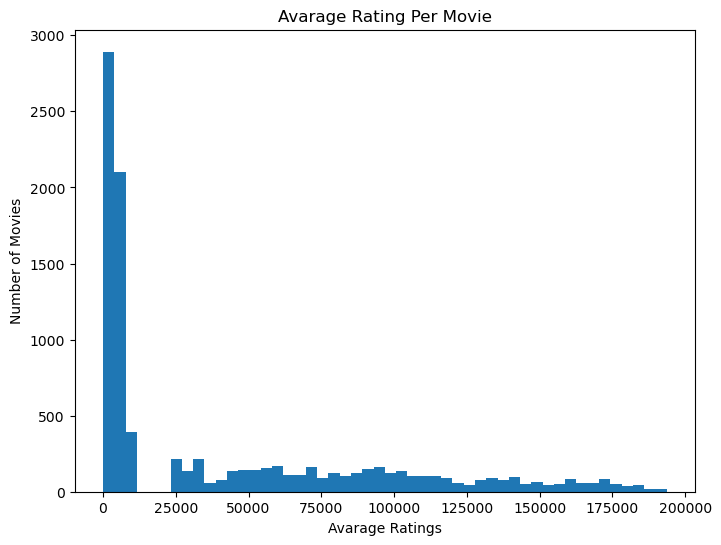

In [12]:
# I will take the avarage rating per movie then sort the value in descending order
avg_rating_per_movie = df.groupby('title')['movieId'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,6))
avg_rating_per_movie.hist(bins=50)
plt.xlabel('Avarage Ratings')
plt.ylabel('Number of Movies')
plt.title('Avarage Rating Per Movie')
plt.grid(False)
plt.show()

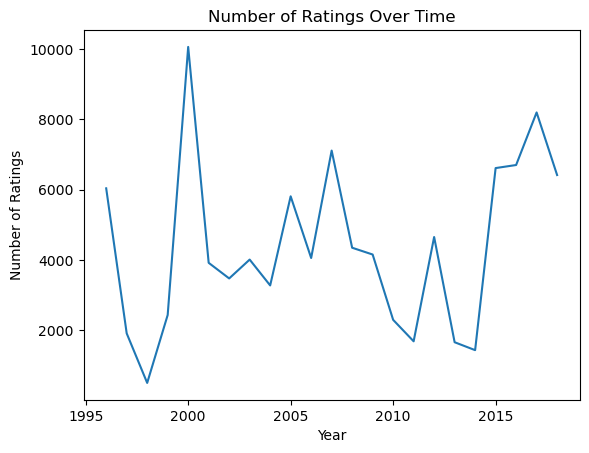

In [13]:
# Here I will take a look at the rating over time
# To do that and since I am taking the rate by year I will have to extract the year column from 'timestamp'
df['year'] = df['timestamp'].dt.year
# Then group the data by year and take it's size
ratings_per_year = df.groupby('year').size()
# Line plots are the best to show time series visualisation
ratings_per_year.plot(kind='line')
plt.title('Number of Ratings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.show()

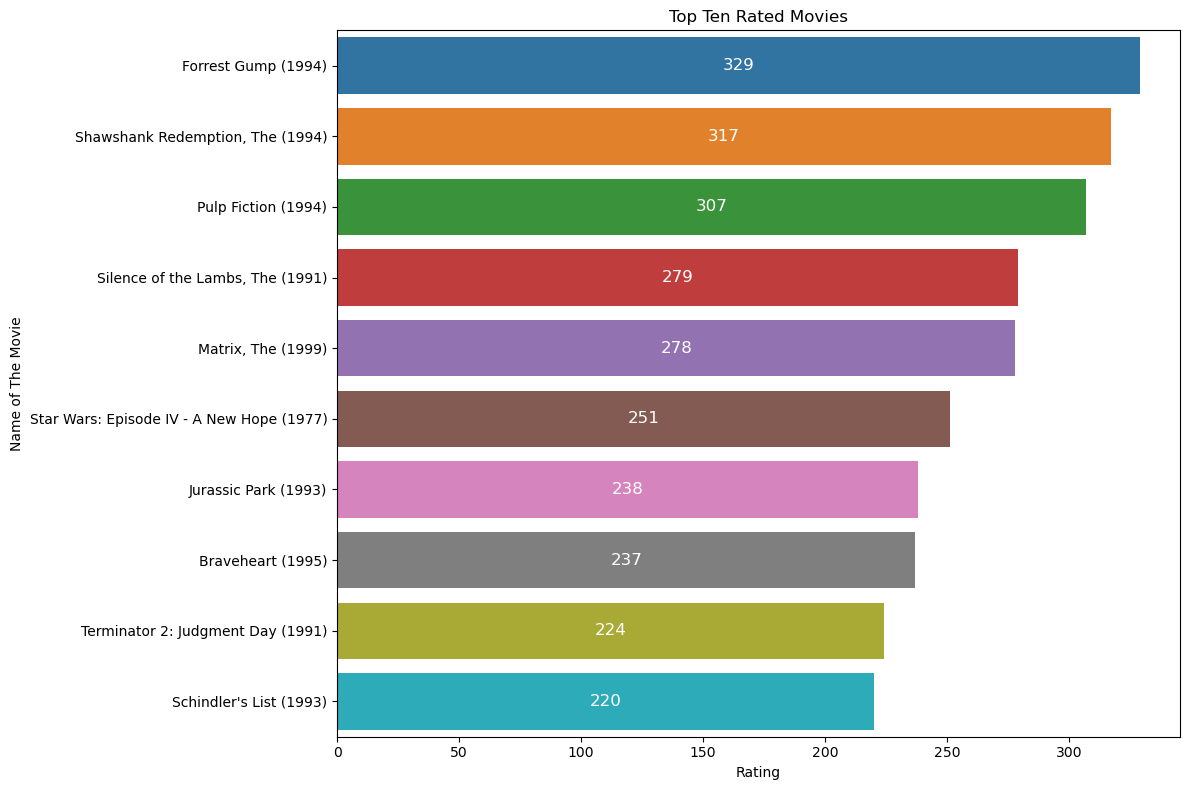

In [14]:
# Now I will take a look at the top ten rated movies
top_10_rating_movies = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
top_10_df = top_10_rating_movies.reset_index()
top_10_df.columns = ['title', 'rating']
plt.figure(figsize=(12,8))
ax = sns.barplot(data=top_10_df, x='rating', y='title')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_width():.0f}' for v in container], label_type='center', fontsize=12, color='white')
plt.title('Top Ten Rated Movies')
plt.xlabel('Rating')
plt.ylabel('Name of The Movie')
plt.tight_layout()
plt.show()

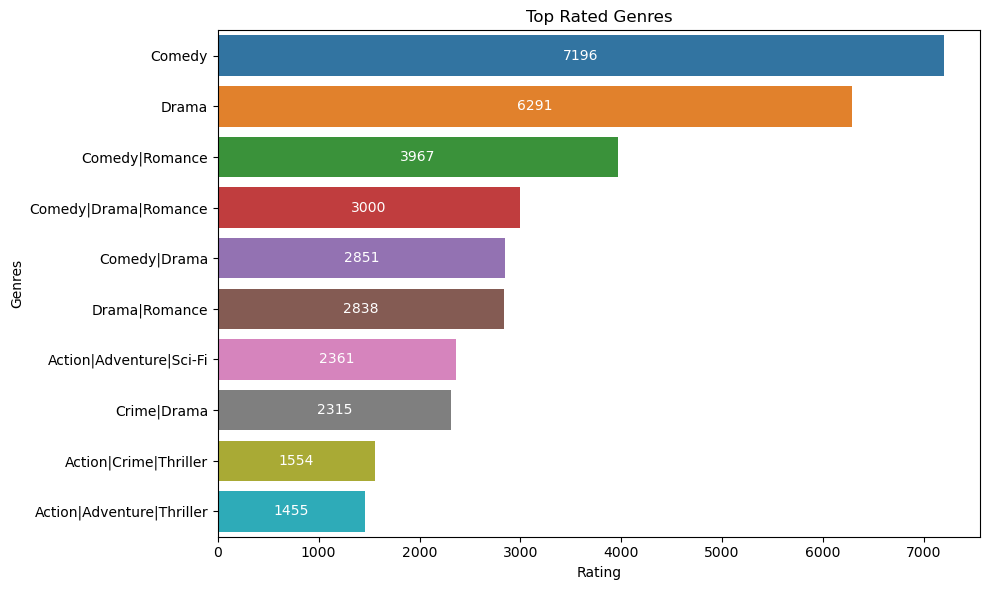

In [15]:
# Top ten genres
top_10_genres = df.groupby('genres')['rating'].count().sort_values(ascending=False).head(10)
top_10_genres = top_10_genres.reset_index()
top_10_genres.columns = ['genres', 'rating']
plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_10_genres, x='rating', y='genres')
for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_width():.0f}' for v in container], label_type='center', fontsize=10, color='white')
plt.title('Top Rated Genres')
plt.xlabel('Rating')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

# Data Pre-Processing

In [16]:
# I will extract a Month and day columns out of 'timestamp'
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df = df.drop(columns=['timestamp'])
df.head()

,movieId,title,genres,userId,rating,year,month,day
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000,7,30
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996,11,8
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005,1,25
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017,11,13
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011,5,18


In [17]:
df.dtypes

movieId      int64
title       object
genres      object
userId       int64
rating     float64
year         int32
month        int32
day          int32
dtype: object

##### My system is having issues with the size of the data I currently have, so I decided to convert the data to it's minimal size.

In [18]:
df['movieId'] = df['movieId'].astype('int32')
df['userId'] = df['userId'].astype('int32')
df['year'] = df['year'].astype('int16')
df['month'] = df['month'].astype('int8')
df['day'] = df['day'].astype('int8')

In [19]:
df.dtypes

movieId      int32
title       object
genres      object
userId       int32
rating     float64
year         int16
month         int8
day           int8
dtype: object

##### Next I will on-hot encod my data using the pandas function .get_dummies(). this step will prep my data for machine learning algorithms.

In [20]:
encoded_df = pd.get_dummies(df)
encoded_df.head()

,movieId,userId,rating,year,month,day,title_'71 (2014),title_'Hellboy': The Seeds of Creation (2004),title_'Round Midnight (1986),title_'Salem's Lot (2004),...,genres_Romance|Thriller,genres_Romance|War,genres_Romance|Western,genres_Sci-Fi,genres_Sci-Fi|IMAX,genres_Sci-Fi|Thriller,genres_Sci-Fi|Thriller|IMAX,genres_Thriller,genres_War,genres_Western
0,1,1,4.0,2000,7,30,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,5,4.0,1996,11,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,7,4.5,2005,1,25,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,15,2.5,2017,11,13,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,17,4.5,2011,5,18,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
# Assing X to the DataFrame features and y to the target column.
X = df[['userId', 'movieId', 'year', 'month', 'day']]
y = df['rating']

In [22]:
# performing a train test split, test size of 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

## KNeighborsRegressor

Since I am working with a continuous values (Ratings), I will have to use KNeighborsRegressor instead of KNeighborsClassifier.

In [24]:
# I will be getting the train and test scores using a range of (1, 50)
test_scores = []
train_scores = []

for i in range(1, 50):
    knr = KNeighborsRegressor(i)
    knr.fit(X_train, y_train)
    train_scores.append(knr.score(X_train, y_train))
    test_scores.append(knr.score(X_test, y_test))

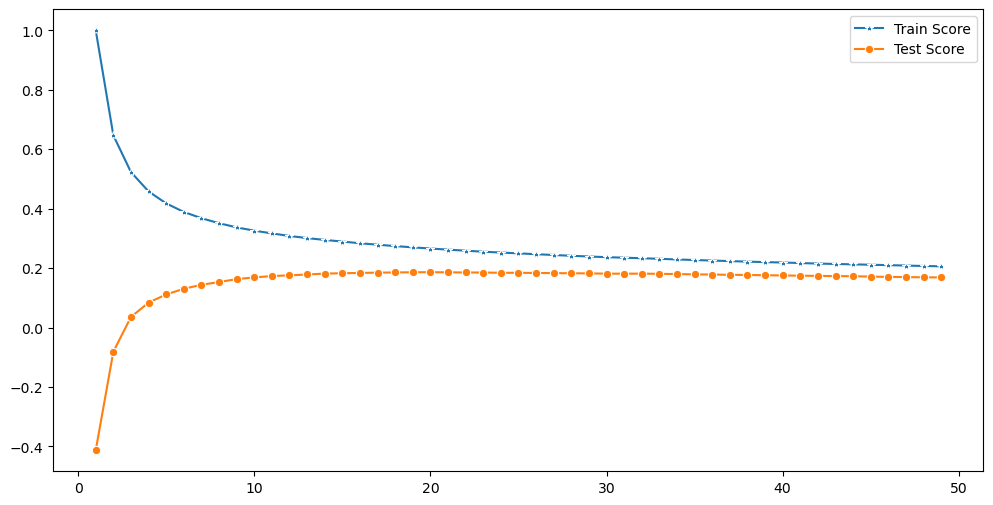

In [25]:
plt.figure(figsize=(12,6))
sns.lineplot(x=range(1,50), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1,50), y=test_scores, marker='o', label ='Test Score')
plt.show()

##### Next thing I will do here is hypermetre tunning using GridSearchCV to find the best scores and best parameter out of a range of (1, 50)

In [26]:
param_grid = {'n_neighbors':np.arange(1,50)}
knr = KNeighborsRegressor()
knr_cv= GridSearchCV(knr,param_grid,cv=5)
knr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
print('The best score is:', knr_cv.best_score_)
print('The best Parameters is:', knr_cv.best_params_)

The best score is: 0.17821312316084179
The best Parameters is: {'n_neighbors': 20}


##### Now we have a best score for our KNeighborsRegressor of 0.18 and best parameters is 20. Next I will apply my new parameters to the KNeighborsRegressor model and get the new train and test scores.

In [28]:
best_knr = KNeighborsRegressor(20)
best_knr.fit(X_train, y_train)

train_score = best_knr.score(X_train, y_train)
test_score = best_knr.score(X_test, y_test)

print("The train score is:", train_score)
print("The test score is :",  test_score)

The train score is: 0.2657587114224761
The test score is : 0.1861921655003539


##### I got a train score of 26% and test score of 18%. in this case I will consider using diffrent model to get higher results for both train data and test data.

## Matrix Factorization-based algorithms

Matrix Factorization-based algorithms such as Singular Value Decomposition (SVD), are widely used in recommendation systems due to their effectiveness in capturing latent factors in the user-item interaction matrix.

In [29]:
# Since I am going to work with Surprise libraries, here I am importing the required libraries.
from collections import defaultdict
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import cross_validate

# Split genres into a list for each movie
df['genres'] = df['genres'].apply(lambda x: x.split('|'))

# Create a mapping of userId to their preferred genres
user_genre_pref = defaultdict(lambda: defaultdict(int))

# Iterating over each user's ratings to count genre occurrences
for index, row in df.iterrows():
    user_id = row['userId']
    genres = row['genres']
    rating = row['rating']
    for genre in genres:
        user_genre_pref[user_id][genre] += rating

# Finding the most preferred genre for each user
user_top_genre = {user: max(genres, key=genres.get) for user, genres in user_genre_pref.items()}

In [31]:
# Load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Initialize the SVD algorithm
algo = SVD()

# Train the algorithm on the training set
algo.fit(trainset)

In [32]:
# Generating predictions for the test set
predictions = algo.test(testset)

# Computing the Root-Mean-square-Error RMSE
rmse = accuracy.rmse(predictions)

# Computing the Mean-Absolute-Error MAE
mae = accuracy.mae(predictions)

# printing RMSE and MAE
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.8788
MAE:  0.6740
RMSE: 0.8788350850967015
MAE: 0.6740430500819615


In [33]:
# Performing model evaluation by cross-validation
cross_val_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Print the results
print("Cross-validation results:")
print(f"Average RMSE: {cross_val_results['test_rmse'].mean()}")
print(f"Average MAE: {cross_val_results['test_mae'].mean()}")


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8775  0.8800  0.8719  0.8731  0.8712  0.8747  0.0034  
MAE (testset)     0.6743  0.6762  0.6684  0.6708  0.6736  0.6726  0.0027  
Fit time          2.49    2.42    2.68    2.68    2.79    2.61    0.14    
Test time         0.34    0.29    0.25    0.56    0.29    0.35    0.11    
Cross-validation results:
Average RMSE: 0.8747266814687107
Average MAE: 0.6726443593768391


In [34]:
# Next I will define a Function that gets the top 5 recommendations for a user based on their genre preference
def get_recommendations(user_id, n=5):
    user_ratings = df[df['userId'] == user_id]
    preferred_genre = user_top_genre.get(user_id, None)
    
    # Filter movies to recommend only those in the preferred genre
    if preferred_genre:
        candidate_movies = df[df['genres'].apply(lambda genres: preferred_genre in genres)]
    else:
        candidate_movies = df
    
    unrated_movies = candidate_movies[~candidate_movies['movieId'].isin(user_ratings['movieId'])]['movieId'].unique()

    predicted_ratings = {}
    for movie_id in unrated_movies:
        predicted_rating = algo.predict(user_id, movie_id).est
        predicted_ratings[movie_id] = predicted_rating

    # Sort the recommendations by predicted rating
    recommended_movies = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)

    # Print the top recommendations
    top_recommendations = []
    for movie_id, predicted_rating in recommended_movies[:n]:
        movie_title = df[df['movieId'] == movie_id]['title'].iloc[0]
        top_recommendations.append((movie_title, predicted_rating))
    
    return top_recommendations

In [35]:
# Example usage
user_id = 1
top_n = 5
recommendations = get_recommendations(user_id, top_n)
print(f"Top {top_n} recommendations for user {user_id}:")
for movie_title, predicted_rating in recommendations:
    print(f"Movie: {movie_title} (Predicted Rating: {predicted_rating})")

Top 5 recommendations for user 1:
Movie: Great Escape, The (1963) (Predicted Rating: 5)
Movie: Seven Samurai (Shichinin no samurai) (1954) (Predicted Rating: 5)
Movie: For a Few Dollars More (Per qualche dollaro in più) (1965) (Predicted Rating: 5)
Movie: Dark Knight, The (2008) (Predicted Rating: 4.955594738729108)
Movie: Logan (2017) (Predicted Rating: 4.954404120664882)


# Summary

### Data Loading
    First Dataset is the Movies Dataset: Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format: movieId, title, genres. And second Dataset is the Ratings Dataset: All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: userId, movieId, rating, timestamp
    
### Data Wrangling
    Not much was done during this step due to the clean data I worked with
    
### Data Exploratory Analysis
    In this step we gathered comprehensive understanding of the data and prepared it for further analysis, I created visualizations like histograms, lineplot and heatmap that helped me explore data distribution, and uncover relationships between variables.
    
### Data Pre-Processing
    Minimized the data to it's minimal and One-Hot encoded data
    
### Modeling

##### KNeighborsRegressor
    I choosed to use KNeighborsRegressor instead of KNeighborsCLassifier due to the continuous data I worked with. Hypermetre tunnig was done on this model using GridSearchCV and got the best train, test scores and the best parameter. KNeighborsRegressor ended up scoring, train score of 26% and test score of 18%.
    
##### Matrix Factorization-based algorithms
    Matrix Factorization-based algorithms such as Singular Value Decomposition (SVD), are widely used in recommendation systems due to their effectiveness in capturing latent factors in the user-item interaction matrix. SVD was evaluated using RMSE, MAE and five fold Cross-Validation scored a resultes of RMSE 87%, MAE 67%
    
# Conclusion

    In this project, we developed a movie recommendation system using a matrix factorization-based algorithm, leveraging the Surprise library. Our objective was to provide personalized movie recommendations for users based on their past ratings, timestamps, and genres they often watch.
    
# Future Work

    To further improve the recommendation system, the following steps can be considered:
    
* Incorporate More Features: Include other potentially influential features such as movie directors, actors, and production studios.
* Advanced Model Tuning: Apply more sophisticated hyperparameter tuning techniques, such as Bayesian optimization, to find the best model parameters.
* Explore Other Algorithms: Experiment with other recommendation algorithms like deep learning-based approaches or hybrid models that combine collaborative filtering and content-based filtering.
* Real-Time Recommendations: Implement the system in a real-time environment to provide up-to-date recommendations as users interact with the platform.

By continually refining the model and incorporating more data, the recommendation system can be made even more precise and user-centric, ultimately enhancing the user experience and engagement with the platform.